In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from patsy import dmatrix 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import linear_model 

In [2]:
ipos = pd.read_csv(r'ipo_data_0.csv', encoding='latin-1') 
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2002/1/28,Synaptics,SYNA,Bear Stearns,$11.00,$13.11,$13.11,19.18%,$2.11,$2.11,2,NaN
1,2002/2/1,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,$12.00,$12.01,$12.05,0.42%,$0.01,$0.05,1,NaN
2,2002/2/1,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,$28.00,$30.05,$29.10,3.93%,$2.05,$1.10,3,NaN
3,2002/2/5,Sunoco Logistics Partners,SXL,Lehman Brothers,$20.25,$21.25,$22.10,9.14%,$1.00,$1.85,3,NaN
4,2002/2/7,ManTech International,MANT,Jefferies,$16.00,$17.10,$18.21,13.81%,$1.10,$2.21,3,NaN
5,2002/2/8,Wimm Bill Dann Foods,WBD,ING Barings,$19.50,$22.00,$22.60,15.90%,$2.50,$3.10,2,NaN
6,2002/2/13,GameStop,GME,Salomon Smith Barney,$18.00,$19.50,$20.10,11.67%,$1.50,$2.10,3,NaN
7,2002/2/15,PayPal,PYPL,Salomon Smith Barney,$13.00,$15.41,$20.09,54.54%,$2.41,$7.09,3,NaN
8,2002/2/22,PETCO Animal Supplies,PETC,Merrill Lynch/Morgan Stanley,$19.00,$19.36,$20.00,5.26%,$0.36,$1.00,2,NaN
9,2002/2/27,Integrated Defense,IDE,Credit Suisse First Boston,$22.00,$26.75,$25.00,13.64%,$4.75,$3.00,3,NaN


### 清理数据

In [3]:
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else x.replace('%',''))

In [4]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 12 columns):
Date                        2329 non-null object
Issuer                      2329 non-null object
Symbol                      2329 non-null object
Lead/Joint-Lead Managers    2329 non-null object
Offer Price                 2329 non-null object
Opening Price               2329 non-null object
1st Day Close               2329 non-null object
1st Day % Px Chng           2329 non-null object
$ Chg Opening               2329 non-null object
$ Chg Close                 2329 non-null object
Star Ratings                2329 non-null object
Performed                   259 non-null object
dtypes: object(12)
memory usage: 218.4+ KB


In [5]:
ipos.replace('N/C',0, inplace=True) 
ipos['Date'] = pd.to_datetime(ipos['Date']) 
ipos['Offer Price'] = ipos['Offer Price'].astype('float') 
ipos['Opening Price'] = ipos['Opening Price'].astype('float') 
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float') 
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float') 
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float') 
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float') 
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 120-11-01 00:00:00

### 数据出现错误


In [6]:
ipos[ipos['Date']=='11/120']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
1660,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.00,17.00,18.40,15.00,1.00,2.40,1,NaN


In [7]:
#调整
ipos.loc[1660, 'Date'] = '2012-11-20'

ipos.replace('N/C',0, inplace=True) 
ipos['Date'] = pd.to_datetime(ipos['Date']) 
ipos['Offer Price'] = ipos['Offer Price'].astype('float') 
ipos['Opening Price'] = ipos['Opening Price'].astype('float') 
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float') 
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float') 
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float') 
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float') 
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

ipos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 12 columns):
Date                        2329 non-null datetime64[ns]
Issuer                      2329 non-null object
Symbol                      2329 non-null object
Lead/Joint-Lead Managers    2329 non-null object
Offer Price                 2329 non-null float64
Opening Price               2329 non-null float64
1st Day Close               2329 non-null float64
1st Day % Px Chng           2329 non-null float64
$ Chg Opening               2329 non-null float64
$ Chg Close                 2329 non-null float64
Star Ratings                2329 non-null int64
Performed                   259 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 218.4+ KB


### 第一天的平均收益百分比

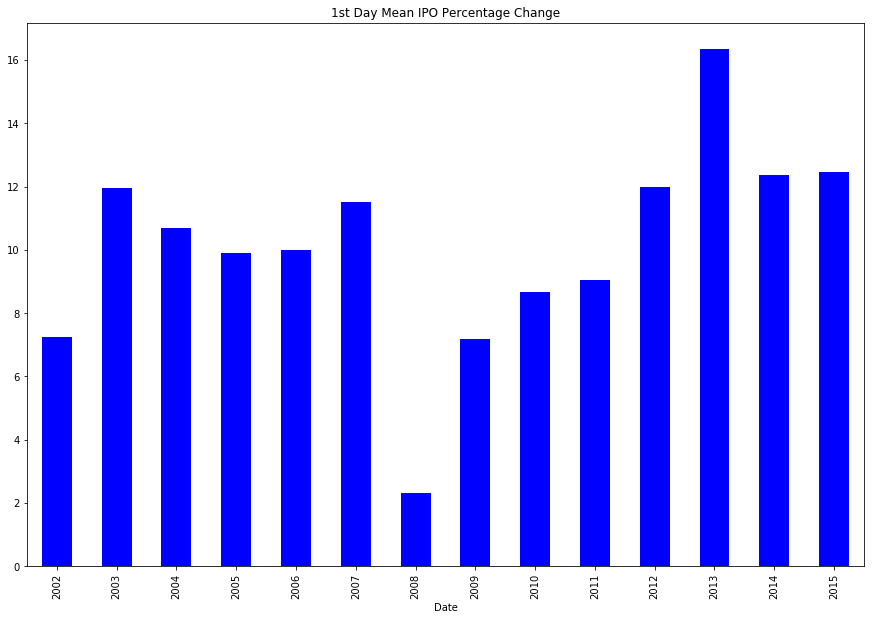

In [8]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].mean().plot(kind= 'bar', figsize=(15,10), color='b', title='1st Day Mean IPO Percentage Change')

### 中位数表现

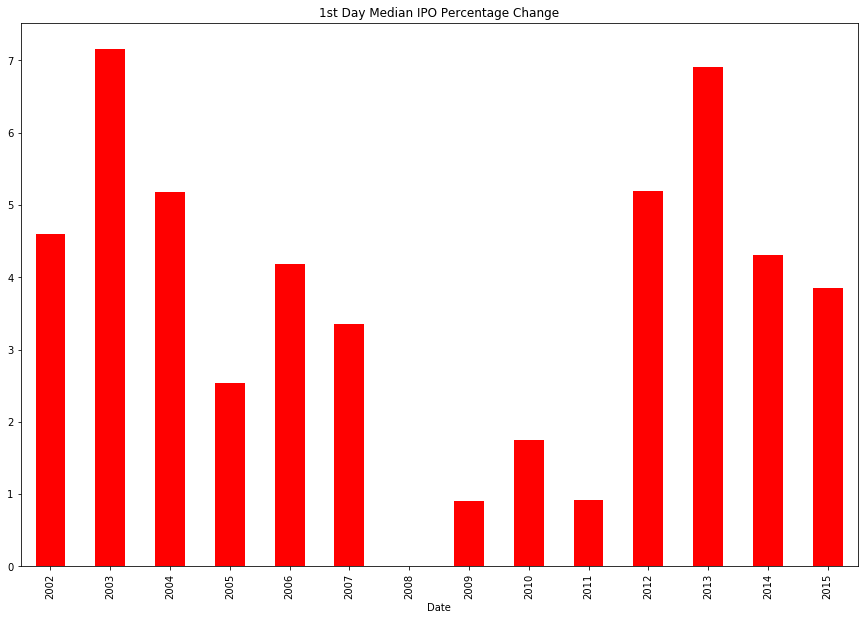

In [9]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].median().plot(kind='bar', figsize=(15,10), color='r', title='1st Day Median IPO Percentage Change')

In [10]:
ipos['1st Day % Px Chng'].describe()

count    2329.000000
mean       11.008429
std        22.617572
min       -35.220000
25%         0.000000
50%         3.670000
75%        16.670000
max       353.850000
Name: 1st Day % Px Chng, dtype: float64

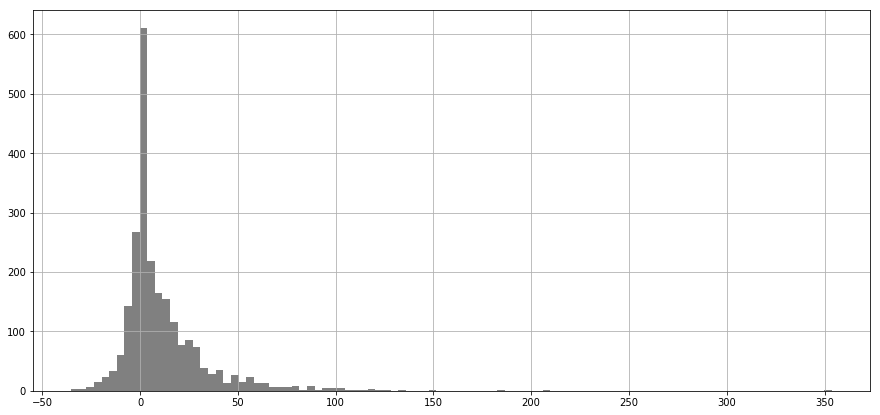

In [11]:
ipos['1st Day % Px Chng'].hist(figsize=(15,7), bins=100, color='grey')

由上图可得出大多数回报在零附近，但是右侧有几个异常值，创建新的列分析异常值

In [12]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening'] 

ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100


In [13]:
ipos['% Chg Open to Close'].describe()

count    2329.000000
mean        0.799005
std         9.387540
min       -98.522167
25%        -2.823920
50%         0.000000
75%         3.686636
max       113.333333
Name: % Chg Open to Close, dtype: float64

最大跌幅几乎达到99%，属于outlier，需要移除

In [19]:
ipos[ipos['% Chg Open to Close']<-98]
ipos.loc[440, '$ Chg Opening'] = .09
ipos.loc[1264, '$ Chg Opening'] = .01
ipos.loc[1264, 'Opening Price'] = 11.26
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100
ipos['% Chg Open to Close'].describe()

count    2329.000000
mean        0.863498
std         9.099885
min       -40.383333
25%        -2.814570
50%         0.000000
75%         3.686636
max       113.333333
Name: % Chg Open to Close, dtype: float64

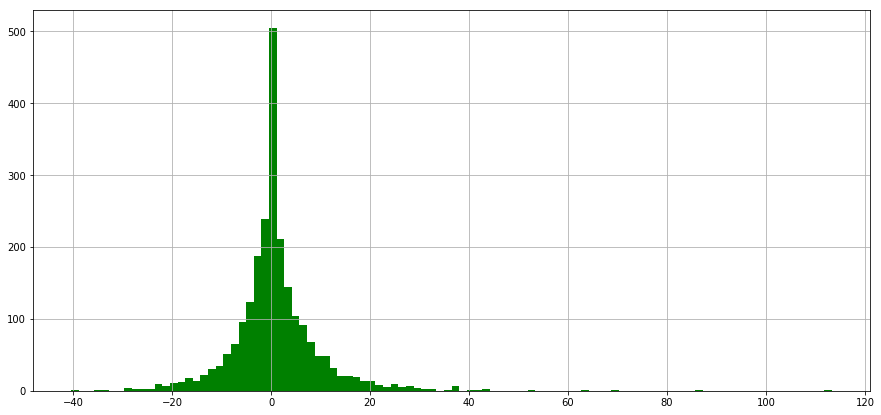

In [20]:
ipos['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='green')

上图所示，极端值较少可以使用

In [23]:
#查看2015至今的数据
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].describe()

count    141.000000
mean       0.151702
std        2.603392
min       -6.160000
25%       -0.720000
50%        0.000000
75%        0.660000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [24]:
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].sum()

21.38999999999999

拆分一下盈利的交易和亏损的交易

In [25]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    70.000000
mean      1.454857
std       2.900963
min       0.010000
25%       0.215000
50%       0.665000
75%       1.315000
max      20.040000
Name: $ Chg Open to Close, dtype: float64

In [26]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe()

count    63.000000
mean     -1.276984
std       1.394371
min      -6.160000
25%      -1.665000
50%      -0.860000
75%      -0.225000
max      -0.010000
Name: $ Chg Open to Close, dtype: float64

由以上数据可得ipo一半挣钱，一半赔钱

## 特征工程


In [29]:
#引入标准普尔500指数
sp = pd.read_csv(r'GSPC.csv') 
sp.reset_index(drop=True, inplace=True)
sp['Date'] = pd.to_datetime(sp['Date']) 

计算标普500 昨日收盘价相对于其七天前收盘价的变化百分比

In [30]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 16
        chg = (sp.iloc[day_ago_idx]['Close'] - \
               sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error 2009-08-01
error 2013-11-16
error 2015-02-21
error 2015-02-21


In [32]:
#出现错误修正数据
ipos.loc[1175, 'Date'] = pd.to_datetime('2009-08-12')
ipos.loc[1881, 'Date'] = pd.to_datetime('2013-11-06')
ipos.loc[2211, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[2212, 'Date'] = pd.to_datetime('2015-05-21')
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

In [34]:
#标准普尔500指数在IPO前一天收盘时到IPO首日开盘时这个期间内，变化的百分比
def get_cto_chg(ipo_dt):
    try:
        today_open_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        chg = (sp.iloc[today_open_idx]['Open'] - sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)


In [35]:
#整理承销商数据
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: x.split('/')[0])
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

In [36]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'
ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'
ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'
ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'
ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'
ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'
ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'
ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'
ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'
ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'
ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'
ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'
ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'
ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'
ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'
ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'
ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'
ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'
ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'
ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'
ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'
ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'
ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'
ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'
ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'
ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'
ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'
ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'
ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'
ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'
ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'
ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'
ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'
ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'
ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'
ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'
ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'
ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [37]:
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: len(x.split('/')))

In [38]:
#添加几个日期相关的特征
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed',\
                                                  3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
ipos['Month'] = ipos['Date'].map(lambda x: x.month)
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [39]:
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100
ipos['Open to Close Pct'] = (ipos['$ Chg Close'].astype('float') -\
                             ipos['$ Chg Opening'].astype('float'))/\
                             ipos['Opening Price'].astype('float') * 100

In [41]:
#构建矩阵
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") + Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") + Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos, return_type='dataframe')
X.head(10)

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,16.094584,2.11,11.00,13.11,0.0,-2.745286
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.083264,0.01,12.00,12.01,0.0,-2.159051
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.821963,2.05,28.00,30.05,0.0,-2.159051
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.705882,1.00,20.25,21.25,0.0,-4.465785
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.432749,1.10,16.00,17.10,0.0,-5.468547
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.363636,2.50,19.50,22.00,0.0,-4.203722
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,7.692308,1.50,18.00,19.50,0.0,-1.055120
7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,15.639195,2.41,13.00,15.41,0.0,-1.384096
8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.859504,0.36,19.00,19.36,0.0,-2.929317
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,17.757009,4.75,22.00,26.75,0.0,1.365088


## 使用逻辑回归

In [54]:
ipos[ipos['Date'] >= '2015-01-01'].index[0]

2188

In [56]:
#以2015年之前的数据为训练集，2015年之后的数据为测试集，
#以1美元为阈值
X_train, X_test = X[:2188], X[2188:]
y_train = ipos['$ Chg Open to Close'][:2188].map(lambda x: 1 if x >= 1 else 0)
y_test = ipos['$ Chg Open to Close'][2188:].map(lambda x: 1 if x >= 1 else 0)

In [57]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
clf.score(X_test, y_test)

0.8368794326241135

In [59]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].describe()

count    141.000000
mean       0.151702
std        2.603392
min       -6.160000
25%       -0.720000
50%        0.000000
75%        0.660000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [60]:
pred_label = clf.predict(X_test)

results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.iloc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf

,index,$ chg,predicted,actual,correct
0,2188,0.01,0,0,1
1,2189,-1.06,0,0,1
2,2190,-2.67,0,0,1
3,2191,2.74,0,1,0
4,2192,-4.05,0,0,1
5,2193,-1.10,0,0,1
6,2194,0.35,0,0,1
7,2195,-0.50,0,0,1
8,2196,7.95,0,1,0
9,2197,-0.60,0,0,1


In [61]:
rf[rf['predicted']==1]['$ chg'].describe()

count     7.000000
mean      3.587143
std       8.130766
min      -2.320000
25%      -1.235000
50%      -0.720000
75%       5.290000
max      20.040000
Name: $ chg, dtype: float64

Text(0.5,0,'Index')

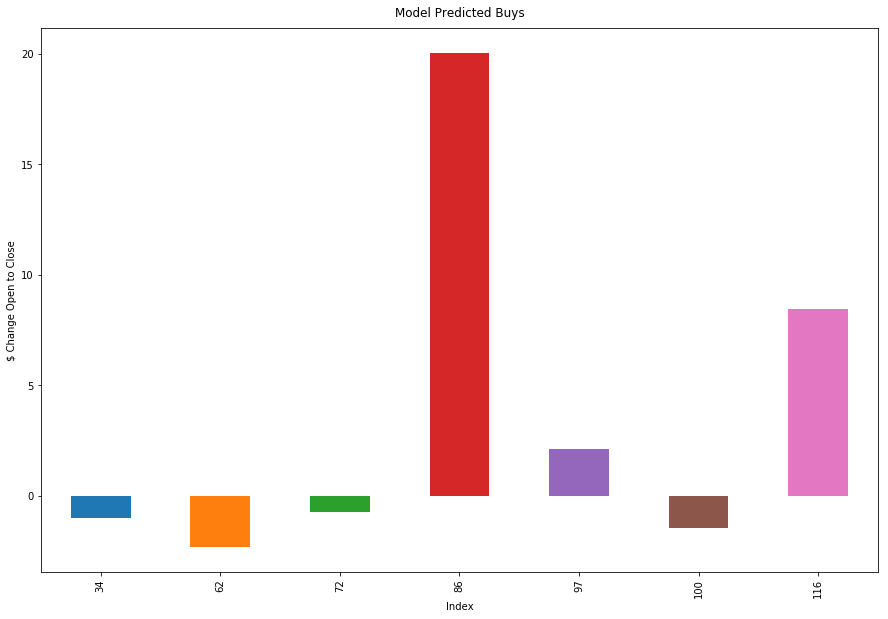

In [62]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [65]:
#将阈值改为0.25美元
X_train, X_test = X[:2188], X[2188:] 
y_train = ipos['$ Chg Open to Close'][:2188].map(lambda x: 1 if x >= .25 else 0) 
y_test = ipos['$ Chg Open to Close'][2188:].map(lambda x: 1 if x >= .25 else 0) 
clf = linear_model.LogisticRegression() 
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6028368794326241

In [66]:
pred_label = clf.predict(X_test)

results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.iloc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

count    20.000000
mean      1.658500
std       5.847896
min      -6.160000
25%      -1.417500
50%       0.095000
75%       2.112500
max      20.040000
Name: $ chg, dtype: float64

### 使用随机森林分类器对特征的重要性进行度量

([<matplotlib.axis.XTick at 0x113875da0>,
 <a list of 20 Text xticklabel objects>)

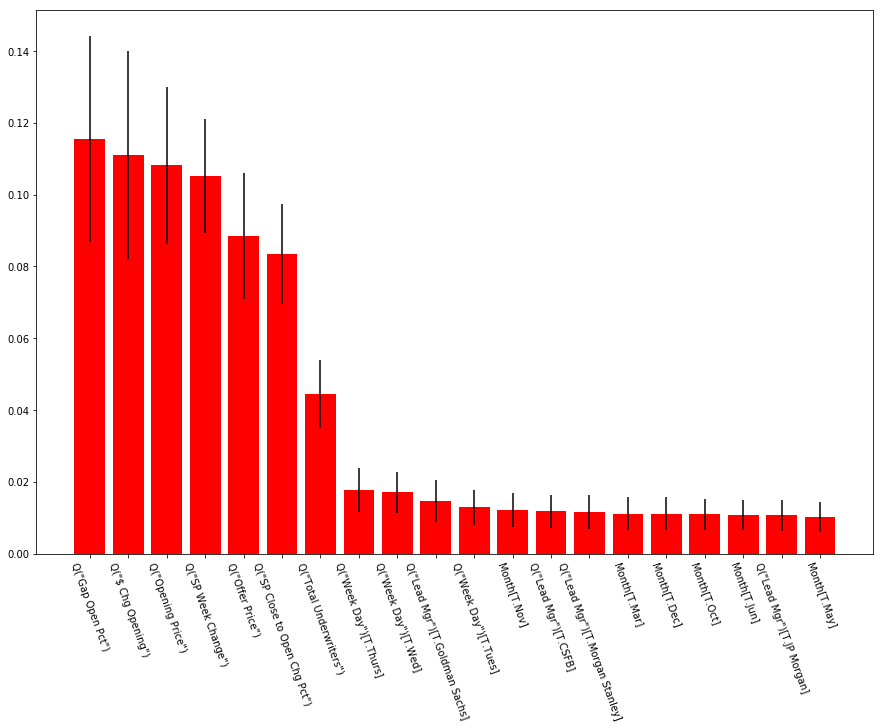

In [68]:
clf_rf = RandomForestClassifier(n_estimators=5000)
model = clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]

plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70)